In [ ]:
# 自己实现算法要分三步:
1. 找到算法的预测函数: y = wx + b -> 1 / (1 + e^-y)
2. 找到算法的损失函数: -(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)). 
3. 使用梯度下降求损失最小的时候的参数(w, b)

In [1]:
import tensorflow as tf
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

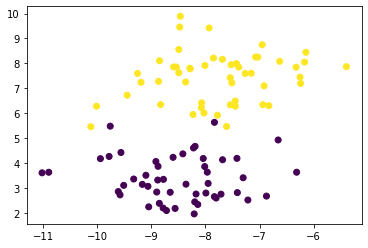

In [4]:
data, target = make_blobs(centers=2)
plt.scatter(data[:, 0], data[:, 1], c=target)

In [5]:
x = tf.constant(data, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

In [6]:
data.shape

(100, 2)

In [7]:
# 参数初始化
W = tf.Variable(np.random.randn(2, 1) * 0.01, dtype=tf.float32)
B = tf.Variable(0., dtype=tf.float32)

In [14]:
# 预测函数
def sigmoid(x):
    linear = tf.matmul(x, W) + B
#     return 1 / (1 + tf.exp(-linear))
    return tf.nn.sigmoid(linear)

In [9]:
# 损失函数
def cross_entropy_loss(y_true, y_pred):
    y_pred = tf.reshape(y_pred, shape=[100])
    # -(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    return tf.reduce_mean(-(tf.multiply(y_true, tf.math.log(y_pred)) + tf.multiply((1 - y_true), tf.math.log(1 - y_pred))))

In [10]:
# 定义优化器
optimizer = tf.optimizers.Adam()

In [16]:
# 优化过程
def run_optimization():
    with tf.GradientTape() as g:
        pred = sigmoid(x)
        loss = cross_entropy_loss(y, pred)
    # 计算梯度
    gradients = g.gradient(loss, [W, B])
    # 更新
    optimizer.apply_gradients(zip(gradients, [W, B]))

In [12]:
# 计算准确率
def accuracy(y_true, y_pred):
    y_pred = tf.reshape(y_pred, shape=[100])
    y_ = y_pred.numpy() > 0.5
    y_true = y_true.numpy()
    return (y_ == y_true).mean()

In [19]:
for i in range(5000):
    run_optimization()
    
    if i % 100 == 0:
        pred = sigmoid(x)
        acc = accuracy(y, pred)
        loss = cross_entropy_loss(y, pred)
        print(f'训练次数: {i}, 准确率: {acc:.3f}, 损失:{loss:.4f}')

训练次数: 0, 准确率: 0.970, 损失:0.0861
训练次数: 100, 准确率: 0.970, 损失:0.0852
训练次数: 200, 准确率: 0.970, 损失:0.0843
训练次数: 300, 准确率: 0.970, 损失:0.0835
训练次数: 400, 准确率: 0.970, 损失:0.0827
训练次数: 500, 准确率: 0.970, 损失:0.0819
训练次数: 600, 准确率: 0.970, 损失:0.0812
训练次数: 700, 准确率: 0.970, 损失:0.0804
训练次数: 800, 准确率: 0.970, 损失:0.0797
训练次数: 900, 准确率: 0.970, 损失:0.0791
训练次数: 1000, 准确率: 0.970, 损失:0.0784
训练次数: 1100, 准确率: 0.970, 损失:0.0778
训练次数: 1200, 准确率: 0.970, 损失:0.0772
训练次数: 1300, 准确率: 0.970, 损失:0.0766
训练次数: 1400, 准确率: 0.970, 损失:0.0761
训练次数: 1500, 准确率: 0.970, 损失:0.0755
训练次数: 1600, 准确率: 0.970, 损失:0.0750
训练次数: 1700, 准确率: 0.970, 损失:0.0745
训练次数: 1800, 准确率: 0.970, 损失:0.0740
训练次数: 1900, 准确率: 0.970, 损失:0.0735
训练次数: 2000, 准确率: 0.970, 损失:0.0730
训练次数: 2100, 准确率: 0.970, 损失:0.0725
训练次数: 2200, 准确率: 0.970, 损失:0.0721
训练次数: 2300, 准确率: 0.970, 损失:0.0717
训练次数: 2400, 准确率: 0.970, 损失:0.0712
训练次数: 2500, 准确率: 0.970, 损失:0.0708
训练次数: 2600, 准确率: 0.970, 损失:0.0704
训练次数: 2700, 准确率: 0.970, 损失:0.0700
训练次数: 2800, 准确率: 0.970, 损失:0.0696
训练次数: 2900, 准确率: 0.970, 损失